In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Step1. [Understand Data]. Using Pandas, import “diabetes.csv” file and print properties such as head,shape,columns,dtype,info and value_counts.

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [7]:
df.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

## Step2. [Build Logistic Regression Model]

###  Prepare X matrix (8 feature columns) and y vector (ie., Outcome column)

In [8]:
inp = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X=df[inp]

In [9]:
y=df.Outcome

### Split dataset with stratified shuffle split for training and testing as X_train, X_test, y_train, y_test (use 25% test size).

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

In [11]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.25,train_size=0.75,random_state=0)
sss.get_n_splits(X, y)

5

In [12]:
for train,test in sss.split(X,y):    
    X_train = X.iloc[train]
    y_train = y.iloc[train]
    X_test = X.iloc[test]
    y_test = y.iloc[test]

### Create LogisticRegression model, fit on training set and predict on test set

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\Arzoo Sah\anaconda3\envs\notebook\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
y_pred=model.predict(X_test)
y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

## Step3. [Predict on a new sample]


### Will this person become diabetic?. His details are given below.                                                     
###    new_person = [[6, 200, 90, 10, 25, 23.3, 0.672, 42]]

In [16]:
new_patients = [[6,200,90,10,25,23.3,0.672,42]]
print(model.predict(new_patients))

[1]


## Step4. [Compute Classification Metrics]
### compute and print Accuracy, Precision, Recall and AUC scores

In [17]:
from sklearn.metrics import precision_score, recall_score,accuracy_score,roc_auc_score

In [18]:
print("LoR Accuracy   ",accuracy_score(y_test,y_pred))
print("LoR Precision  ",precision_score(y_test,y_pred))
print("LoR Recall     ",recall_score(y_test,y_pred))
print("LoR AUC        ",roc_auc_score(y_test,y_pred))

LoR Accuracy    0.7864583333333334
LoR Precision   0.782608695652174
LoR Recall      0.5373134328358209
LoR AUC         0.7286567164179104


## Step5. [Understand Correlation]
### Create confusion matrix between y_test and y_pred and plot confusion matrix values in a Heatmap. Explain the meaning of the 4 numbers you get.

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[115,  10],
       [ 31,  36]], dtype=int64)

<AxesSubplot:>

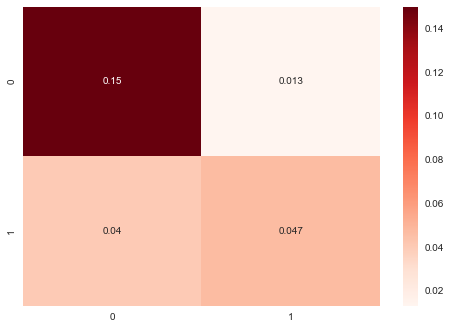

In [20]:
sns.heatmap(confusion_matrix(y_test,y_pred) / len(y), cmap='Reds', annot=True)

## Step6. [Normalization using MinmaxScaler and rebuild LoR] 

In [21]:
from sklearn.preprocessing import MinMaxScaler
m_scaler = MinMaxScaler()

###  Now, normalize your X_train and X_test values using MinMaxScaler

In [22]:
m_ss = m_scaler.fit_transform(X_train)
m_ss1 = m_scaler.transform(X_test)

### Create a new LogisticRegression model, fit on normalized training set and predict on the normalized test set

In [23]:
model1 = LogisticRegression()
model1.fit(m_ss,y_train)

LogisticRegression()

In [24]:
ms_y_pred=model1.predict(m_ss1)
ms_y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

### Compute and print Accuracy, Precision, Recall and AUC scores

In [25]:
print("MinMaxScaler Accuracy   ",accuracy_score(y_test,ms_y_pred))
print("MinMaxScaler Precision  ",precision_score(y_test,ms_y_pred))
print("MinMaxScaler Recall     ",recall_score(y_test,ms_y_pred))
print("MinMaxScaler AUC        ",roc_auc_score(y_test,ms_y_pred))

MinMaxScaler Accuracy    0.7864583333333334
MinMaxScaler Precision   0.8095238095238095
MinMaxScaler Recall      0.5074626865671642
MinMaxScaler AUC         0.7217313432835821


## Step7. [Normalization using StandardScaler and rebuild LoR]

### Repeat Step5 with StandardScaler

In [26]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [27]:
ss = scale.fit_transform(X_train)
ss1 = scale.transform(X_test)

In [28]:
model2 = LogisticRegression()
model2.fit(ss,y_train)

LogisticRegression()

In [29]:
m_y_pred=model1.predict(ss1)
m_y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [30]:
print("StandardScaler Accuracy  ",accuracy_score(y_test,m_y_pred))
print("StandardScaler Precision ",precision_score(y_test,m_y_pred))
print("StandardScaler Recall    ",recall_score(y_test,m_y_pred))
print("StandardScaler AUC       ",roc_auc_score(y_test,m_y_pred))

StandardScaler Accuracy   0.78125
StandardScaler Precision  0.8205128205128205
StandardScaler Recall     0.47761194029850745
StandardScaler AUC        0.7108059701492537


## Step8. [Plot ROC curve]
### Plot ROC curve as shown below. You can use the MinmaxScaler scaled values of X_test for computing predict_proba() score.

In [31]:
from sklearn.metrics import roc_curve

In [32]:
pred_prob1 = model1.predict_proba(m_ss1)
fpr1, tpr1, thresh1 = roc_curve(y_test,pred_prob1[:,1], pos_label=1)

<ipython-input-33-e7d465f84cbb>:3: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.7,0],s=("MinMax ROC ",roc_auc_score(y_test,ms_y_pred)))


Text(0, 0.5, 'True  Positive Rate')

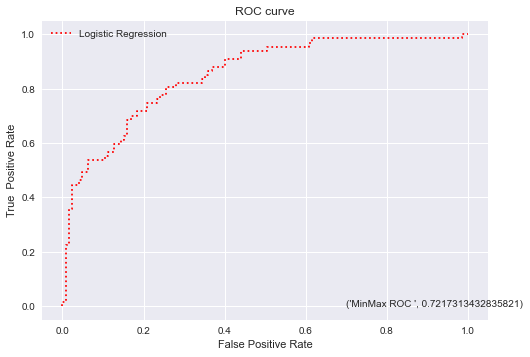

In [33]:
plt.plot(fpr1,tpr1,linestyle=':',color='red',label='Logistic Regression')
plt.legend(loc='best')
plt.annotate(xy=[0.7,0],s=("MinMax ROC ",roc_auc_score(y_test,ms_y_pred)))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True  Positive Rate')

## Step9. [Comparison with KNN classifier].
### Create a KNN classifier with default values, fit on the scaled X using MinmaxScaler, predict and print classification metric scores.

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
model3  = KNeighborsClassifier(n_neighbors=3)

In [36]:
model3.fit(m_ss,y_train)

KNeighborsClassifier(n_neighbors=3)

In [37]:
knn_y_pred = model3.predict(m_ss1)
knn_y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [38]:
print("KNN Accuracy  ",accuracy_score(y_test,knn_y_pred))
print("KNN Precision ",precision_score(y_test,knn_y_pred))
print("KNN Recall    ",recall_score(y_test,knn_y_pred))
print("KNN AUC       ",roc_auc_score(y_test,knn_y_pred))

KNN Accuracy   0.6927083333333334
KNN Precision  0.5740740740740741
KNN Recall     0.4626865671641791
KNN AUC        0.6393432835820896


## Step10. [Update ROC curve]
### Update your ROC curve, this time, with one more curve of KNN classifier,

In [39]:
pred_prob2 = model3.predict_proba(m_ss1)
fpr1,tpr1,thresh1 = roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test,pred_prob2[:,1],pos_label=1)

<ipython-input-40-52f7c67b6eff>:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.7,0.2],s=("LoR ROC ",roc_auc_score(y_test,ms_y_pred)))
<ipython-input-40-52f7c67b6eff>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.7,0.1],s=("KNN ROC ",roc_auc_score(y_test,knn_y_pred)))


Text(0, 0.5, 'True  Positive Rate')

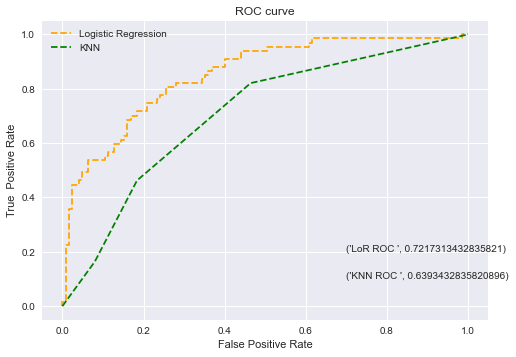

In [40]:
 plt.plot(fpr1,tpr1,linestyle='--',color='orange',label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle='--',color='green',label='KNN')
plt.legend(loc='best')
plt.annotate(xy=[0.7,0.2],s=("LoR ROC ",roc_auc_score(y_test,ms_y_pred)))
plt.annotate(xy=[0.7,0.1],s=("KNN ROC ",roc_auc_score(y_test,knn_y_pred)))
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True  Positive Rate')

## Step11. [Regularization]
### In order to reduce overfitting of your data, you will use LogisticRegressionCV model with L1 and L2 regularization parameters. Create both models using the following statements

In [41]:
from sklearn.linear_model import LogisticRegressionCV

In [42]:
model4 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear')
model5 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2')

### Perform fit using MinmaxScaler scaled values and predict

In [43]:
print(model4.fit(m_ss,y_train))
print(model5.fit(m_ss,y_train))    

LogisticRegressionCV(cv=4, penalty='l1', solver='liblinear')
LogisticRegressionCV(cv=4)


In [44]:
lr_y_pred1=model4.predict(m_ss1)
lr_y_pred2=model5.predict(m_ss1)
print(lr_y_pred1)
print("\n\n")
print(lr_y_pred2)

[1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 1 0 1]



[1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 0 1 1 0 1]


In [45]:
print("LoR_CV L1 AUC:  ",roc_auc_score(y_test,lr_y_pred1))
print("LoR_CV L2 AUC:  ",roc_auc_score(y_test,lr_y_pred2))

LoR_CV L1 AUC:   0.7321194029850747
LoR_CV L2 AUC:   0.7361194029850746


## Step12. [Update ROC curve]
### Update your ROC curve, this time, with two more curves

In [46]:
pred_prob3 = model4.predict_proba(m_ss1)
pred_prob4 = model5.predict_proba(m_ss1)
fpr1,tpr1,thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3,tpr3,thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4,tpr4,thresh4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)

<ipython-input-47-7f7649d528f4>:5: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.6,0.6],s=("LoR ROC ",roc_auc_score(y_test,ms_y_pred)))
<ipython-input-47-7f7649d528f4>:6: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.6,0.5],s=("KNN ROC ",roc_auc_score(y_test,knn_y_pred)))
<ipython-input-47-7f7649d528f4>:7: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=[0.6,0.4],s=("LoR L1 ROC ",roc_auc_score(y_test,lr_y_pred1)))
<ipython-input-47-7f7649d528f4>:8: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib

Text(0, 0.5, 'True  Positive Rate')

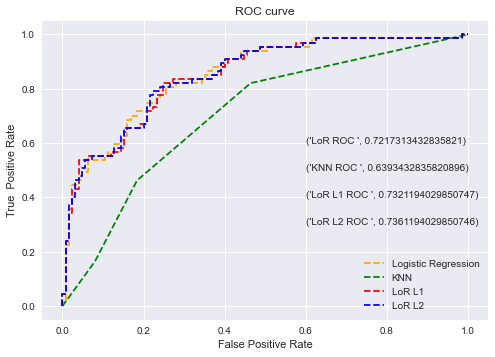

In [47]:
plt.plot(fpr1,tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2,tpr2,linestyle='--',color='green', label='KNN')
plt.plot(fpr3,tpr3,linestyle='--',color='red', label='LoR L1')
plt.plot(fpr4,tpr4,linestyle='--',color='blue', label='LoR L2')
plt.annotate(xy=[0.6,0.6],s=("LoR ROC ",roc_auc_score(y_test,ms_y_pred)))
plt.annotate(xy=[0.6,0.5],s=("KNN ROC ",roc_auc_score(y_test,knn_y_pred)))
plt.annotate(xy=[0.6,0.4],s=("LoR L1 ROC ",roc_auc_score(y_test,lr_y_pred1)))
plt.annotate(xy=[0.6,0.3],s=("LoR L2 ROC ",roc_auc_score(y_test,lr_y_pred2)))
plt.legend(loc='best')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True  Positive Rate')